In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

[[0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]]


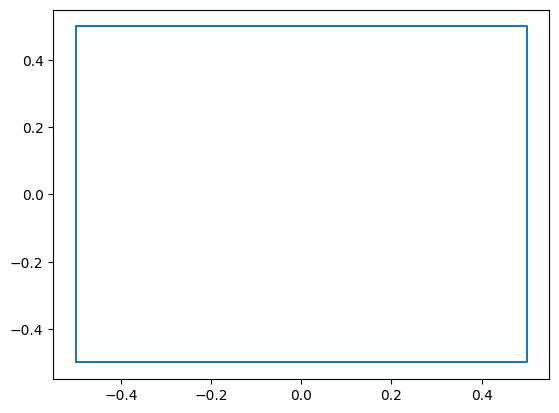

In [2]:
P = np.array([[0,1,1,0,0], [0, 0, 1, 1, 0]]).T
print(P)
P = P-1/2
plt.plot(P[:,0], P[:, 1]);

In [3]:
def Bound(P, ang):
    L = [P[i, 0]*np.cos(ang) + P[i, 1]*np.sin(ang) for i in range(P.shape[0])]
    return min(L), max(L)

In [5]:
S = 0
for _ in range(10000):
    ang = np.random.uniform(0, np.pi)
    p = np.random.uniform(-1, 1)
    m, M = Bound(P, ang)
    if m <= p <= M:
        S += 1
print(S)
print(np.pi*S/10000)

6325
1.987057353395544


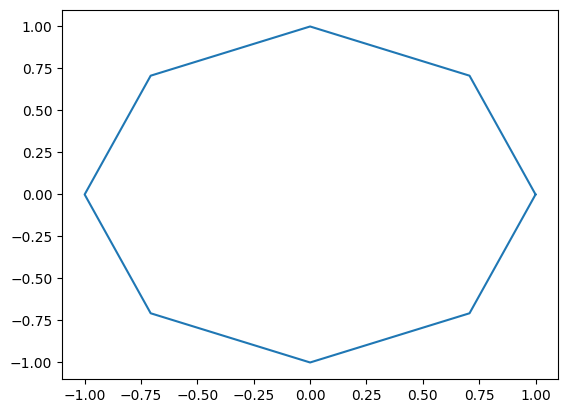

In [6]:
X = np.cos(np.arange(9)*2*np.pi/8)
Y = np.sin(np.arange(9)*2*np.pi/8)
P = np.array([X,Y]).T
plt.plot(P[:,0], P[:, 1]);

In [7]:
S = 0
for _ in range(10000):
    ang = np.random.uniform(0, np.pi)
    p = np.random.uniform(-1, 1)
    m, M = Bound(P, ang)
    if m <= p <= M:
        S += 1
print(S)
print(np.pi*S/10000)

9732
3.0573979704735867


In [8]:
2*8*np.sin(np.pi/8)/2

3.0614674589207183

In [9]:
def UnifPoly(P, R):
    boo = False
    while not boo:
        ang = np.random.uniform(0, np.pi)
        p = np.random.uniform(-1, 1)
        m, M = Bound(P, ang)
        boo = m <= p <= M
    return p, ang

(-1.0, 1.0)

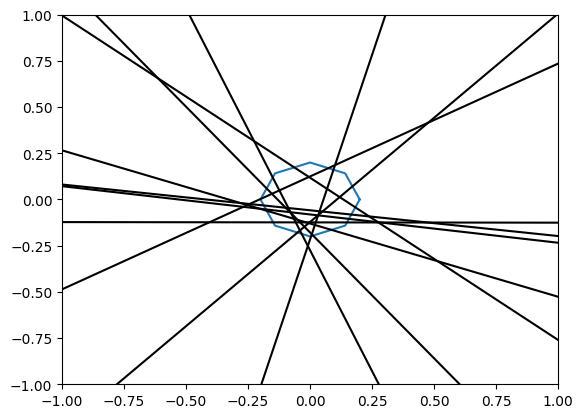

In [10]:
plt.plot(0.2*P[:,0], 0.2*P[:, 1]);
R = 1
for _ in range(10):
    p, ang = UnifPoly(0.2*P, R)
    x = [-R, R]
    y = [(p + R*np.cos(ang))/np.sin(ang), (p - R*np.cos(ang))/np.sin(ang)]
    plt.plot(x, y, color="black")
plt.xlim([-1, 1])
plt.ylim([-1, 1]);

In [23]:
def Intersec(P, p, ang):
    ux = P[0, 0]
    uy = P[0, 1]
    vx = P[1, 0]
    vy = P[1, 1]
    t = (p-ux*np.cos(ang)-uy*np.sin(ang))/((vx-ux)*np.cos(ang)+(vy-uy)*np.sin(ang))
    return t

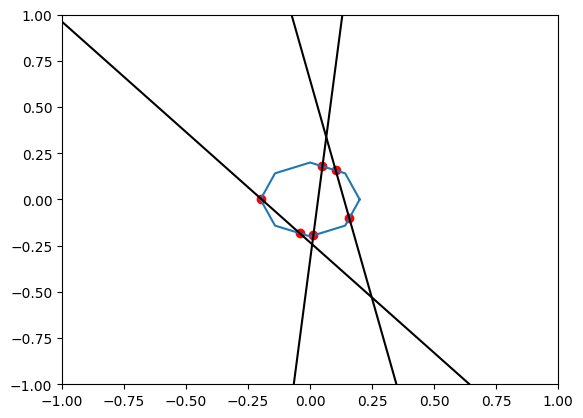

In [26]:
Q = 0.2*P
plt.plot(Q[:,0], Q[:, 1]);
R = 1
for _ in range(3):
    p, ang = UnifPoly(Q, R)
    x = [-R, R]
    y = [(p + R*np.cos(ang))/np.sin(ang), (p - R*np.cos(ang))/np.sin(ang)]
    plt.plot(x, y, color="black")
    for i in range(Q.shape[0]-1):
        t = Intersec(Q[i:(i+2), :], p ,ang)
        if 0 <= t <= 1:
            plt.scatter([(1-t)*Q[i, 0] + t*Q[i+1, 0]], [(1-t)*Q[i, 1] + t*Q[i+1, 1]], c="red")
plt.xlim([-1, 1])
plt.ylim([-1, 1]);

In [97]:
def CutPoly(P, p, ang):
    n = P.shape[0]
    ind = []
    cut_point = []
    for i in range(n-1):
        t = Intersec(P[i:(i+2), :], p ,ang)
        if 0 <= t <= 1:
            ind += [i]
            cut_point += [[(1-t)*P[i, 0] + t*P[i+1, 0]], [(1-t)*P[i, 1] + t*P[i+1, 1]]]
    if len(ind) == 0:
        return P
    P1 = np.vstack((P[:(ind[0]+1),:], np.array(cut_point[0:2]).T, np.array(cut_point[2:4]).T, P[(ind[1]+1):, :])) 
    P2 = np.vstack((np.array(cut_point[0:2]).T, P[(ind[0]+1):(ind[1]+1),:], np.array(cut_point[2:4]).T, np.array(cut_point[0:2]).T))
    return P1, P2

[[2.00000000e-01 0.00000000e+00]
 [1.41421356e-01 1.41421356e-01]
 [1.22464680e-17 2.00000000e-01]]
[[-0.11299901  0.15319428]]


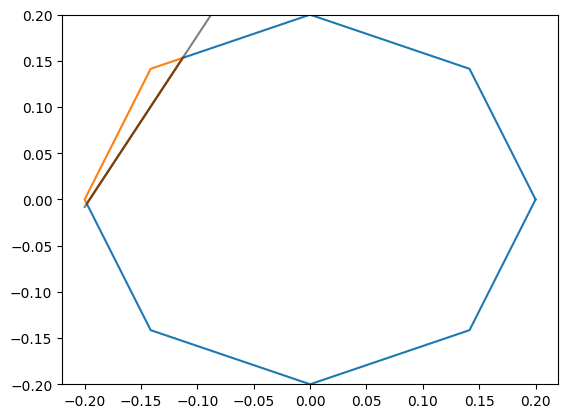

In [75]:
Q = 0.2*P
R = 1
p, ang = UnifPoly(Q, R)
R = 0.2
P1, P2 = CutPoly(Q, p, ang)
plt.plot(P1[:,0], P1[:, 1]);
plt.plot(P2[:,0], P2[:, 1]);
#plt.plot(Q[:,0], Q[:, 1], alpha=0.5, color="red");
x = [-R, R]
y = [(p + R*np.cos(ang))/np.sin(ang), (p - R*np.cos(ang))/np.sin(ang)]
plt.plot(x, y, color="black", alpha=0.5)
plt.ylim([-0.2, 0.2]);

In [107]:
def PolyArea(P):
    x = P[:, 0]
    y = P[:, 1]
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

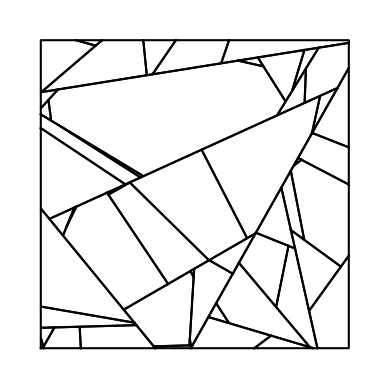

In [133]:
P = np.array([[0,1,1,0,0], [0, 0, 1, 1, 0]]).T - 1/2
R = 1

p, ang = UnifPoly(P, R)
P1, P2 = CutPoly(P, p, ang)
L = [P1, P2]
for i in range(50):
    area = np.array([PolyArea(Poly) for Poly in L])
    area /= np.sum(area)
    index = stats.rv_discrete(name='custm', values=(np.arange(len(L)), area)).rvs(size=1)[0]
    Q = L.pop(index)
    p, ang = UnifPoly(Q, R)
    P1, P2 = CutPoly(Q, p, ang)
    L += [P1, P2]
    
fig = plt.figure()
ax = fig.add_subplot(111)
for Pol in L:
    ax.plot(Pol[:, 0], Pol[:, 1], color="black");
ax.set_xlim([-0.6, 0.6])
ax.set_ylim([-0.6, 0.6])
ax.axis("off")
ax.set_aspect("equal");